<a href="https://colab.research.google.com/github/M-H-Amini/MachineLearning-AUT/blob/master/MLe_Lec1_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In The Name Of ALLAH
# Machine Learning *elementary* Course
## Amirkabir University of Technology
### Mohammad Hossein Amini (mhamini@aut.ac.ir)
# Lecture 1 - Linear Regression

<img src="https://drive.google.com/uc?id=144SDpgv7EEy6Og1ZFNIv_nBaugKGiSCE" width="400">



# Introduction

The theoretical stuff has been discussed in the video lectures. Let's implement a little...

First of all, we should import some modules.

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
print(tf.__version__)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

2.2.0-rc4


# Creating Dataset

Let's create a simple one dimensional dataset...

In [0]:
x = np.array([np.linspace(10, 50, 15)])
y = 2 + 1.5 * x +  10 * np.random.normal(0, 1, x.shape)

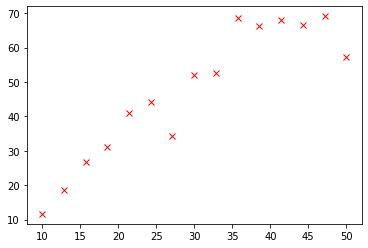

In [3]:
plt.figure()
plt.plot(x, y, 'rx')
plt.show()

# Linear Regression (Hand Coding!)
Now, we implement our estimator just using **numpy**. In this method, we implement gradients calculation and weight updates (gradient descent) by hand!

Let's implement estimator (hypothesis) function.

In [4]:
def h(x, w):
  x = np.concatenate((np.ones((1, x.shape[1])) ,x))
  return np.dot(np.transpose(w), x)

w = np.array([[1], [0.5]])
print(h(np.array([[1]]), w))

[[1.5]]


## Visualizing Data and Estimator Result
It is exciting to see the performance with a simple function.

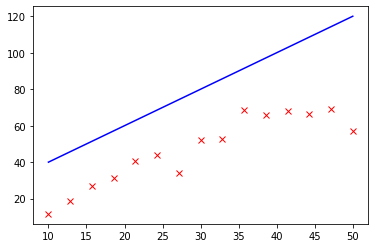

In [8]:
def show(x, y, w):
  predicted = h(x, w)
  plt.figure()
  plt.plot(x[0:1,:], y, 'rx')
  plt.plot(x[0], predicted[0], 'b-')
  plt.show()

w = np.array([[20], [2]])
show(x, y, w)

In [9]:
alpha = 0.0001

def train_step(x, y, w):
  delta_w = -np.dot(x, np.transpose(y - h(x, w)))
  w = w - alpha * delta_w
  return w

def cost(x, y, w):
  return float(np.dot(y - h(x, w),np.transpose(y - h(x, w))) / (2*y.shape[1]))

def train(x, y, max_iters=1000, min_cost=0.1, w=None, verbose=0):
  if w is None:
    w = np.random.rand(2, 1)
  for i in range(max_iters):
    index = np.random.randint(0, x.shape[1])
    w = train_step(x[:, index:index+1], y[:, index:index+1], w)
    if cost(x, y, w) < min_cost:
      break
    if verbose:
      print('Iteration {}: W = '.format(i+1),np.transpose(w), 'Cost = ', cost(x, y, w))
  print("Training Done...")
  print("Cost: {}".format(cost(x, y, w)))
  print("w = ", w.T)
  return w

w = train(x, y, max_iters=1000, min_cost=10 ,verbose=0)

Training Done...
Cost: 36.924839664217544
w =  [[1.52552769 1.63043765]]


## Visualizing Performance
Let's see the result.

Input: 10.000, Target: 11.626, Output: 17.830
Input: 12.857, Target: 18.458, Output: 22.488
Input: 15.714, Target: 26.719, Output: 27.147
Input: 18.571, Target: 31.209, Output: 31.805
Input: 21.429, Target: 40.877, Output: 36.463
Input: 24.286, Target: 44.038, Output: 41.122
Input: 27.143, Target: 34.236, Output: 45.780
Input: 30.000, Target: 52.013, Output: 50.439
Input: 32.857, Target: 52.701, Output: 55.097
Input: 35.714, Target: 68.593, Output: 59.755
Input: 38.571, Target: 66.112, Output: 64.414
Input: 41.429, Target: 67.865, Output: 69.072
Input: 44.286, Target: 66.617, Output: 73.731
Input: 47.143, Target: 69.092, Output: 78.389
Input: 50.000, Target: 57.289, Output: 83.047


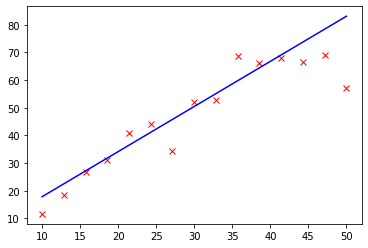

In [10]:
for i in range(x.shape[1]):
  print('Input: {:5.3f}, Target: {:5.3f}, Output: {:5.3f}'.format(x[:,i:i+1][0][0], y[:, i:i+1][0][0], h(x[:, i:i+1], w)[0][0]))

show(x, y, w)

<img src="https://drive.google.com/uc?id=1kZYpzQKiV95eL6EZHL_CaE0Ca49MkLPO" width="400">


# Normal Equation
Use of normal equation, wherever possible, makes our life a lot easier! The main reason is that it is not an iterative method. You get the minimum in a few computations, instead of (maybe) thousands of iterations of last method. 


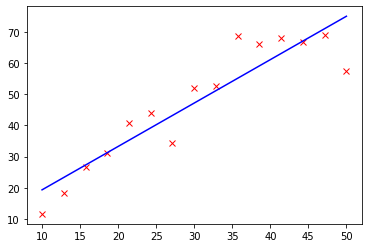

In [14]:
def findWeights(x, y):
  x = np.transpose(np.concatenate((np.ones((1, x.shape[1])),x)))
  y = np.transpose(y)
  w = np.dot(np.dot(np.linalg.inv(np.dot(x.T, x)), x.T), y)
  return w

w = np.random.rand(2,1)
w = findWeights(x, y)
show(x, y, w)


# Polynomial Regression

(3, 50) (1, 50)


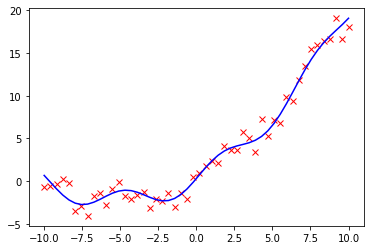

In [33]:
xx = np.array([np.linspace(-10, 10, 50)])
yy = xx + 0.1*np.power(xx,2) + np.sin(xx) + np.random.randn(*xx.shape)
w = np.array([[0],[0],[0],[0]])

xxx = np.concatenate((xx, np.power(xx, 2), np.sin(xx)))
print(xxx.shape, yy.shape)
w = findWeights(xxx, yy)
show(xxx, yy, w)


<img src="https://drive.google.com/uc?id=12Ain53U4GehBQgCzY0AKtAtG6kkyfhc0" width="600">


# Linear Regression (Using Tensorflow 2)
Now let's use **tensorflow**. Some benefits of using tensorflow:


*   We can create more complex models in it without doing some theory stuff like finding gradients by hand!
*   Using some amazing optimizers.
*   Extensive use in deep learning.



In [0]:
X = tf.constant(x, dtype=tf.float32)
Y = tf.constant(y, dtype=tf.float32)

In [0]:
def tf_h(x, w):
  x = tf.concat((tf.ones((1, x.shape[1])), x), 0)
  return tf.matmul(w, x, True)

## Visualizing Data and Estimator Result

In [0]:
def tf_show(x, y, w):
  predicted = tf_h(x, w)
  plt.figure()
  plt.plot(x, y, 'rx')
  plt.plot(x[0], predicted[0], 'b--o')
  plt.show()

W = tf.Variable(np.random.rand(2, 1), dtype=tf.float32)
tf_show(X, Y, W)

In [0]:
optimizer = tf.optimizers.Adam()

def tf_loss(x, y, w):
  e = y - tf_h(x, w)
  return tf.matmul(e, e, transpose_b=True)

def tf_cost(X, Y, W):
  a = Y - tf_h(X, W)
  return tf.matmul(a, a, transpose_b=True)/(2*X.shape[1])

def tf_train_step(x, y, w, verbose=0):
  with tf.GradientTape() as t:
    J = tf_loss(x, y, w)
    if verbose:
      print('Loss: ',J)
  w_grads = t.gradient(J, w)
  optimizer.apply_gradients(zip([w_grads], [w]))
  return w

def tf_train(X, Y, max_iters=1000, min_cost=0.01, W=None, verbose=0):
  if W is None:
    W = tf.Variable(np.random.rand(2, 1), dtype=tf.float32)
  for i in range(max_iters):
    index = np.random.randint(0, x.shape[1])
    tf_train_step(X[:, index:index+1], Y[:, index:index+1], W)
    cost_value = tf_cost(X, Y, W).numpy()[0][0]
    if verbose:
      print('Cost: ', cost_value)
    if cost_value < min_cost:
      break
  print("Training Done...")
  print("Cost: {}".format(tf_cost(X, Y, W).numpy()[0][0]))
  print("W = ", W)
  return W
  
W = tf.Variable(np.random.rand(2, 1), dtype=tf.float32)
index = np.random.randint(0, x.shape[1])
print('Before: ', W.numpy().T)
tf_train_step(X[:, index:index+1], Y[:, index:index+1], W)
print('After: ', W.numpy().T)
print('Cost: ', tf_cost(X, Y, W).numpy())


In [0]:
W = tf_train(X, Y, W=W)

## Visualizing Performance


In [0]:
tf_show(X, Y, W)

# California Housing Dataset


In [0]:
ds = pd.read_csv('sample_data/california_housing_train.csv')

In [0]:
ds.head()

In [0]:
ds.describe()

In [0]:
m = ds.mean()
s = ds.std()
print('Mean:\n', m)
print('Standard Deviation:\n', s)

## Method 1
In this method, we simply load the dataset and convert it to *tensors*. After that our life is made easy! we just use the previous functions we implemented by tensorflow.

Now we separate inputs from targets.

In [0]:
ds_arr = np.transpose(np.array(ds))
X = ds_arr[:-1, :]
y = ds_arr[-1:, :]
print(X.shape, y.shape)

Converting data to *tensors*

In [0]:
X = tf.constant(X, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)
W = tf.Variable(np.random.rand(X.shape[0]+1, 1), dtype=tf.float32)

Let's do the training now.

In [0]:
W = tf_train(X, y, max_iters=10000, W=W, verbose=0)

Finally, we can see how well we did!

In [0]:
o = tf_h(X, W).numpy()
for i in range(10):
  print('No: {}'.format(i+1), '\tTarget: {}'.format(ds_arr[-1, i]), '\tPredicted: {}'.format(o[0, i]))

## Method 2
In this method we do a little **preprocess**. We first **normalize** the dataset. This help faster convergence.

Other steps are just like *method 1*.

In [0]:
def normalize(ds):
  mean = np.array(ds.mean())
  mean = mean[np.newaxis, :]
  std = np.array(ds.std())
  std = std[np.newaxis, :]
  X = np.array(ds)
  X = (X-mean)/std
  return X

def denormalize(y, ds):
  mean = np.array(ds.mean())[-1]
  std = np.array(ds.std())[-1]
  y = (y*std) + mean
  return y

In [0]:
ds_arr = np.transpose(np.array(ds))
normalized_ds_arr = np.transpose(normalize(ds))
y = normalized_ds_arr[-1:, :]
X = normalized_ds_arr[:-1, :]

In [0]:
X = tf.constant(X, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)
W = tf.Variable(np.random.rand(X.shape[0]+1, 1), dtype=tf.float32)

In [0]:
W = tf_train(X, y, max_iters=10000, W=W, verbose=0)

In [0]:
o = tf_h(X, W).numpy()
o = denormalize(o, ds)
for i in range(10):
  print('No: {}'.format(i+1), '\tTarget: {}'.format(ds_arr[-1, i]), '\tPredicted: {}'.format(o[0, i]))

In [0]:
def showOutputs(y, predicted, no=100):
  x = np.arange(0, no)
  y = y[0,:no]
  predicted = predicted [0,:no]
  print(y.shape, predicted.shape)
  plt.figure()
  plt.plot(x, y, 'rx')
  plt.plot(x, predicted, 'b--o')
  plt.show()

showOutputs(ds_arr[-1:,:], o, 10)


<img src="https://drive.google.com/uc?id=1w9dinogGqiVM_7wg3FESNSdAQnempPOj" width="400">
